# Quora Question Pairs
This notebook contains different methods for solving semantic sentences similarity problem. The goal is to compare 2 sentenses and decide whether they have the same semantic meaning.
The used dataset is from kaggle competition:
https://www.kaggle.com/c/quora-question-pairs

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from torchtext import data

In [10]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [4]:
train['is_duplicate']

0         0
1         0
2         0
3         0
4         0
         ..
404285    0
404286    1
404287    0
404288    0
404289    0
Name: is_duplicate, Length: 404290, dtype: int64

Total amount of rows:  404290
Procentadge amount of duplicate questions: 36.9197853026293 %
Total amount of questions:  808580
Total amount of unique questions:  537933


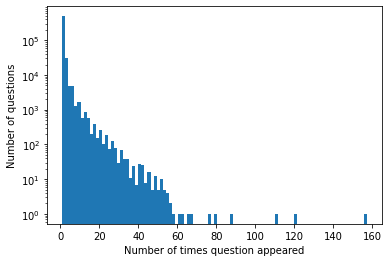

In [5]:
def stats():
    length = len(train)
    is_dublicate = len(train[train['is_duplicate'] == True])/length*100
    questions = pd.concat([train['qid1'], train['qid2']])
    
    print('Total amount of rows: ',length)
    print(f'Procentadge amount of duplicate questions: {is_dublicate} %',)
    print('Total amount of questions: ',len(questions))
    print('Total amount of unique questions: ',len(questions.unique()))

    plt.hist(questions.value_counts(), bins=100)
    plt.yscale('log', nonposy='clip')
    plt.xlabel('Number of times question appeared')
    plt.ylabel('Number of questions')
    questions.nunique()
stats()

In [11]:
questions = pd.concat([train['question1'], train['question2']]).astype('U').to_list()

# Tfid

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

doc_vectors = TfidfVectorizer().fit_transform(questions)

In [9]:
length = len(train)
cosine_similarities =[]
for i in range(len(train)):
    cosine_similarities.append(float(linear_kernel(doc_vectors[i:i+1], doc_vectors[length+i:length+i+1]).flatten().squeeze()))

#document_scores = [item.item() for item in cosine_similarities[1:]]

In [22]:
new_array = []
for i in range(len(train)):
    if(cosine_similarities[i] > 0.5):
        new_array.append(True)
    else: new_array.append(False)


In [23]:
sum(train.is_duplicate == new_array)/404290

0.6631180588191644

# FastText

In [197]:
import torch
import torchtext
vectors = torchtext.vocab.FastText()

.vector_cache/wiki.en.vec: 6.60GB [09:30, 11.6MB/s]                                
100%|██████████| 2519370/2519370 [02:37<00:00, 16038.56it/s]


In [17]:
from nltk.tokenize import word_tokenize
tokenized_sent = []
i = 0
length = len(questions)
for s in questions:
    i+=1
    if(i%10000 == 0):
        print(f'{i}/{length}')
    tokenized_sent.append(word_tokenize(s.lower()))
tokenized_sent

10000/808580
20000/808580
30000/808580
40000/808580
50000/808580
60000/808580
70000/808580
80000/808580
90000/808580
100000/808580
110000/808580
120000/808580
130000/808580
140000/808580
150000/808580
160000/808580
170000/808580
180000/808580
190000/808580
200000/808580
210000/808580
220000/808580
230000/808580
240000/808580
250000/808580
260000/808580
270000/808580
280000/808580
290000/808580
300000/808580
310000/808580
320000/808580
330000/808580
340000/808580
350000/808580
360000/808580
370000/808580
380000/808580
390000/808580
400000/808580
410000/808580
420000/808580
430000/808580
440000/808580
450000/808580
460000/808580
470000/808580
480000/808580
490000/808580
500000/808580
510000/808580
520000/808580
530000/808580
540000/808580
550000/808580
560000/808580
570000/808580
580000/808580
590000/808580
600000/808580
610000/808580
620000/808580
630000/808580
640000/808580
650000/808580
660000/808580
670000/808580
680000/808580
690000/808580
700000/808580
710000/808580
720000/808580
7

[['what',
  'is',
  'the',
  'step',
  'by',
  'step',
  'guide',
  'to',
  'invest',
  'in',
  'share',
  'market',
  'in',
  'india',
  '?'],
 ['what',
  'is',
  'the',
  'story',
  'of',
  'kohinoor',
  '(',
  'koh-i-noor',
  ')',
  'diamond',
  '?'],
 ['how',
  'can',
  'i',
  'increase',
  'the',
  'speed',
  'of',
  'my',
  'internet',
  'connection',
  'while',
  'using',
  'a',
  'vpn',
  '?'],
 ['why',
  'am',
  'i',
  'mentally',
  'very',
  'lonely',
  '?',
  'how',
  'can',
  'i',
  'solve',
  'it',
  '?'],
 ['which',
  'one',
  'dissolve',
  'in',
  'water',
  'quikly',
  'sugar',
  ',',
  'salt',
  ',',
  'methane',
  'and',
  'carbon',
  'di',
  'oxide',
  '?'],
 ['astrology',
  ':',
  'i',
  'am',
  'a',
  'capricorn',
  'sun',
  'cap',
  'moon',
  'and',
  'cap',
  'rising',
  '...',
  'what',
  'does',
  'that',
  'say',
  'about',
  'me',
  '?'],
 ['should', 'i', 'buy', 'tiago', '?'],
 ['how', 'can', 'i', 'be', 'a', 'good', 'geologist', '?'],
 ['when', 'do', 'you', '

In [97]:
len(train),len(tokenized_sent)

(404290, 808580)

In [223]:
i = 0
length = len(train)
result = []
for index in range(length):
    i+=1
    if(i%100000 == 0):
        print(f'{i}/{length}')
    question1=torch.ones(vectors[word].shape)
    question2=torch.ones(vectors[word].shape)
    for word in tokenized_sent[index]:
        question1+=vectors[word]
    for word in tokenized_sent[length+index]:
        question2+=vectors[word]
    question1=question1/len(tokenized_sent[index])
    question2=question2/len(tokenized_sent[length+index])
    result.append(torch.cosine_similarity(question1.unsqueeze(0),question2.unsqueeze(0)).tolist()[0])
    

100000/404290
200000/404290
300000/404290
400000/404290


In [233]:
new_array = []
for i in range(len(result)):
    if(result[i] >= 0.95):
        new_array.append(True)
    else: new_array.append(False)

In [234]:
sum(train.is_duplicate == new_array)/404290

0.6718469415518563